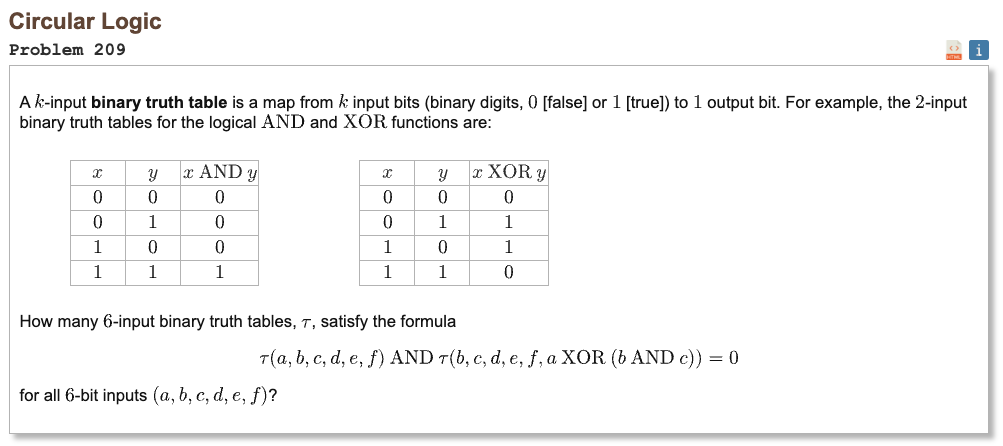

## Initial approach

* think of each 6 bit input as a node x from 0 to 63
* define a transition T that maps (a,b,c,d,e,f) to (b,c,d,e,f, a xor (b and c))
* the condition tau(x) AND tau(T(x)) = 0 means you are never allowed to have tau(x)=1 and tau(T(x))=1 at the same time
* T is a permutation, so the 64 nodes split into disjoint cycles
* on one cycle of length n, the constraint becomes a circular binary string of length n with no adjacent 1s
* the number of valid labelings on a length n cycle is the Lucas number L(n)
* multiply L(n) over all cycle lengths to get the total number of truth tables

In [1]:
def transition(x: int) -> int:
    a = (x >> 0) & 1
    b = (x >> 1) & 1
    c = (x >> 2) & 1
    d = (x >> 3) & 1
    e = (x >> 4) & 1
    f = (x >> 5) & 1
    a2 = b
    b2 = c
    c2 = d
    d2 = e
    e2 = f
    f2 = a ^ (b & c)
    return a2 | (b2 << 1) | (c2 << 2) | (d2 << 3) | (e2 << 4) | (f2 << 5)

def lucas(n: int) -> int:
    if n == 0:
        return 2
    if n == 1:
        return 1
    a, b = 2, 1
    for _ in range(2, n + 1):
        a, b = b, a + b
    return b

def solve() -> int:
    visited = [False] * 64
    result = 1
    for i in range(64):
        if visited[i]:
            continue
        cur = i
        length = 0
        while not visited[cur]:
            visited[cur] = True
            length += 1
            cur = transition(cur)
        result *= lucas(length)
    return result

In [2]:
%%time
result = solve()
print("Result:", result)

Result: 15964587728784
CPU times: user 282 μs, sys: 135 μs, total: 417 μs
Wall time: 323 μs
